## Wrangling US County-Level Mortality

In [47]:
import pandas as pd

### Finding Relevant Mortality Categories
Looking at all the categories of mortality to see which one is related to maternal health. It seems like we should narrow down on **maternal disorders** and **neonatal disorders**.

In [48]:
countyMortality = pd.read_csv("mort.csv")
set(countyMortality['Category'].values)

{'Cardiovascular diseases',
 'Chronic respiratory diseases',
 'Cirrhosis and other chronic liver diseases',
 'Diabetes, urogenital, blood, and endocrine diseases',
 'Diarrhea, lower respiratory, and other common infectious diseases',
 'Digestive diseases',
 'Forces of nature, war, and legal intervention',
 'HIV/AIDS and tuberculosis',
 'Maternal disorders',
 'Mental and substance use disorders',
 'Musculoskeletal disorders',
 'Neglected tropical diseases and malaria',
 'Neonatal disorders',
 'Neoplasms',
 'Neurological disorders',
 'Nutritional deficiencies',
 'Other communicable, maternal, neonatal, and nutritional diseases',
 'Other non-communicable diseases',
 'Self-harm and interpersonal violence',
 'Transport injuries',
 'Unintentional injuries'}

### Create a More Specific Dataset
Limiting observations to those in North Carolina for maternal disorders and neonatal disorders

In [49]:
countyMortality = countyMortality[countyMortality.Location.str.contains('North Carolina')]
countyMortality = countyMortality[(countyMortality.Category.str.contains('Maternal disorders')) |  (countyMortality.Category.str.contains('Neonatal disorders'))]
names = countyMortality['Location']
names = [x if x == "North Carolina" else x.split(', ')[0] for x in names]
countyMortality['Location'] = names
countyMortality

,Location,FIPS,Category,"Mortality Rate, 1980*","Mortality Rate, 1980* (Min)","Mortality Rate, 1980* (Max)","Mortality Rate, 1985*","Mortality Rate, 1985* (Min)","Mortality Rate, 1985* (Max)","Mortality Rate, 1990*",...,"Mortality Rate, 2005* (Max)","Mortality Rate, 2010*","Mortality Rate, 2010* (Min)","Mortality Rate, 2010* (Max)","Mortality Rate, 2014*","Mortality Rate, 2014* (Min)","Mortality Rate, 2014* (Max)","% Change in Mortality Rate, 1980-2014","% Change in Mortality Rate, 1980-2014 (Min)","% Change in Mortality Rate, 1980-2014 (Max)"
1924,North Carolina,37.0,Neonatal disorders,11.39,10.96,12.27,8.64,8.40,9.20,7.52,...,5.95,4.94,4.56,5.09,4.43,4.05,4.60,-61.12,-66.29,-58.74
1925,Alamance County,37001.0,Neonatal disorders,11.42,10.18,12.73,8.69,7.87,9.64,7.78,...,6.87,5.45,4.90,5.96,5.07,4.56,5.57,-55.60,-61.58,-51.53
1926,Alexander County,37003.0,Neonatal disorders,8.01,6.81,9.34,6.00,5.15,6.98,5.24,...,4.89,3.69,3.11,4.28,3.35,2.80,3.90,-58.19,-65.78,-52.66
1927,Alleghany County,37005.0,Neonatal disorders,7.61,6.31,9.24,5.71,4.74,6.84,4.87,...,4.61,3.33,2.67,4.00,2.97,2.33,3.58,-61.00,-68.81,-54.45
1928,Anson County,37007.0,Neonatal disorders,15.05,13.17,17.17,11.48,10.10,12.94,10.20,...,9.37,7.34,6.43,8.35,6.55,5.73,7.42,-56.50,-62.07,-51.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49930,Wayne County,37191.0,Maternal disorders,0.43,0.35,0.53,0.36,0.29,0.44,0.33,...,0.53,0.46,0.34,0.60,0.45,0.33,0.60,3.83,-26.31,41.63
49931,Wilkes County,37193.0,Maternal disorders,0.20,0.16,0.25,0.19,0.15,0.24,0.25,...,0.39,0.32,0.22,0.42,0.32,0.22,0.44,56.33,5.68,114.34
49932,Wilson County,37195.0,Maternal disorders,0.50,0.40,0.60,0.42,0.33,0.51,0.37,...,0.58,0.50,0.36,0.68,0.48,0.33,0.66,-3.31,-34.15,37.05
49933,Yadkin County,37197.0,Maternal disorders,0.19,0.15,0.25,0.17,0.13,0.22,0.21,...,0.39,0.28,0.19,0.40,0.27,0.18,0.39,41.09,-10.00,103.80


### Isolating Maternal Disorders
Visualizing the % Change in Mortality Rate, 1980-2014 from maternal disorders. Green means that the percent change in mortality rate from maternal disorders from 1980 to 2014 has decreased. Red means that the percent change in mortality rate from maternal disorders from 1980 to 2014 has increased.

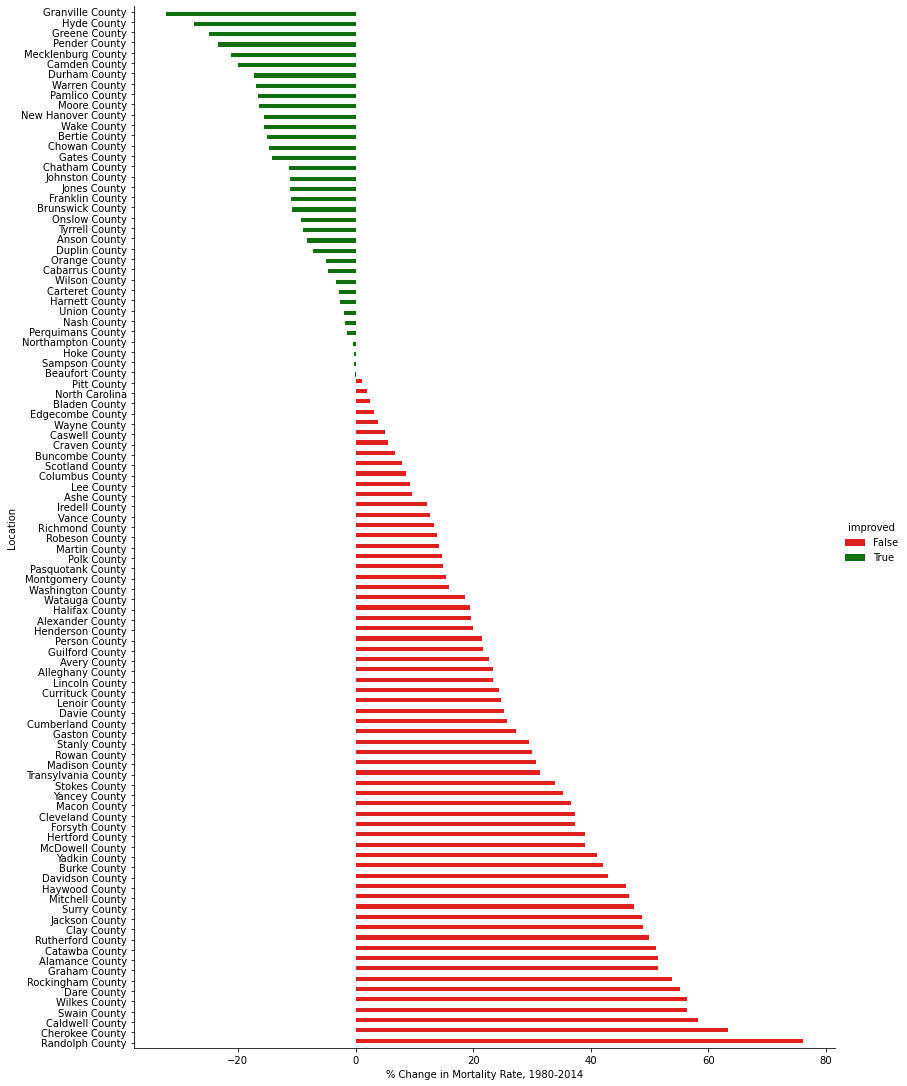

In [50]:
import seaborn as sns

maternalChange = countyMortality[countyMortality['Category'] == "Maternal disorders"]
maternalChange = maternalChange.sort_values('% Change in Mortality Rate, 1980-2014')
maternalChange['improved'] = maternalChange['% Change in Mortality Rate, 1980-2014'] < 0
sns.catplot(y="Location", x = "% Change in Mortality Rate, 1980-2014",
           kind = "bar", data = maternalChange,
            height=15, aspect=11.7/15, hue="improved",
           palette=sns.color_palette(['red', 'green']))

Overall, it seems like North Carolina's has a positive change in mortality Rate from 1980-2014, with Randolph County performing the worst. Granville County has seen the best percentage improvement in mortality rate.

### Isolating Neonatal Disorders
Visualzing the % Change in Mortality Rate, 1980-2014 from neonatal disorders. Green means that the percent change in mortality rate from neonatal disorders from 1980 to 2014 has decreased. Red means that the percent change in mortality rate from neonatal disorders from 1980 to 2014 has increased. Unlike the change in mortality rate for maternal disorders, it seems like all counties have a negative percent change in mortality rate from neonatal disorders, so we'll provide two visualizations -- the latter of which is on a positive scale that resembles % decrease. This is a surprising trend considering how over half of North Carolina counties so a worsening mortality rate as a result of maternal disorders during this time. We would've expected something similar for neonatal disorders.

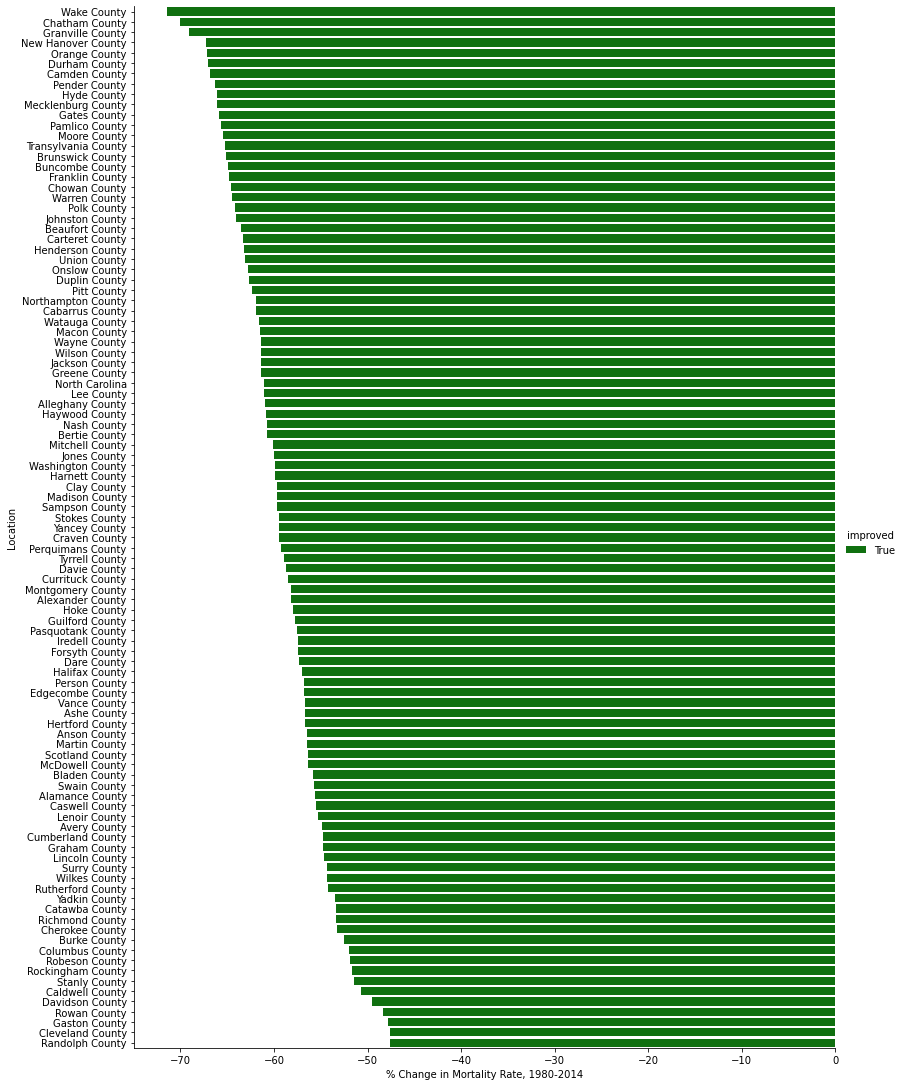

In [51]:
neonatalChange = countyMortality[countyMortality['Category'] == "Neonatal disorders"]
neonatalChange = neonatalChange.sort_values('% Change in Mortality Rate, 1980-2014')
neonatalChange['improved'] = neonatalChange['% Change in Mortality Rate, 1980-2014'] < 0
sns.catplot(y="Location", x = "% Change in Mortality Rate, 1980-2014",
           kind = "bar", data = neonatalChange,
            height=15, aspect=11.7/15, hue="improved",
           palette=sns.color_palette(['green', 'red']))

[Text(0.5, 0, '% Decrease in Mortality Rate, 1980-2014'),
 Text(0, 0.5, 'Location')]

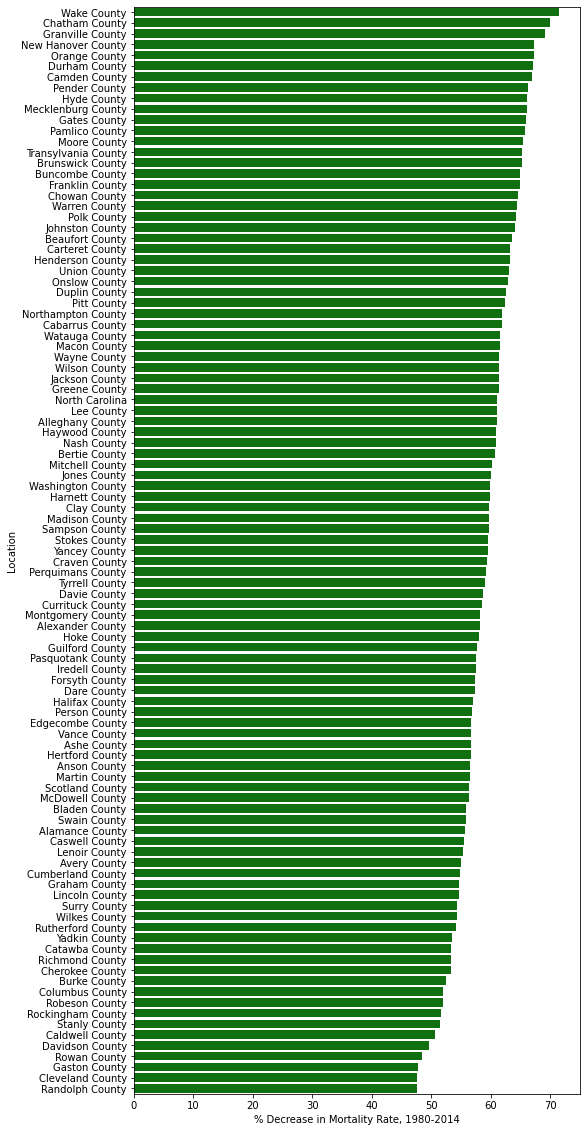

In [52]:
from matplotlib import pyplot as plt
location = neonatalChange['Location']
change = neonatalChange['% Change in Mortality Rate, 1980-2014'] * -1
plt.figure(figsize=(8,20))
fig = sns.barplot(y=location, x = change, color="green")
fig.set(xlabel = '% Decrease in Mortality Rate, 1980-2014', ylabel = 'Location')

In [53]:
maternalChange = maternalChange.rename(columns = {'FIPS':'GEOID20'})
maternalChange = maternalChange.drop(['Category'], axis=1)

In [54]:
#maternalChange.to_csv("../data/maternal_disorder_mortality.csv")

In [55]:
neonatalChange = neonatalChange.rename(columns = {'FIPS':'GEOID20'})
neonatalChange = neonatalChange.drop(['Category'], axis=1)

In [56]:
#neonatalChange.to_csv("../data/neonatal_disorder_mortality.csv")